In [ ]:
# 데이터 확인
import csv

with open('data-files/subway-data.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    for idx, row in enumerate(reader):
        print(row)
        if idx == 5:
            break
            

In [ ]:
# map 함수 사용 연습

import csv

with open('data-files/subway-data.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    for idx, row in enumerate(reader):
        # print(row[4:])
        # changed = [int(x.replace(',','')) for x in row [4:-1]]과 같다.
        # changed = map(int, row[4:-1]) # map(변환함수, 데이터)-> input갯수와 output갯수 같음, 다른 것은 reduce # 함수, 해당 data . int로 바꿈(row[4:]) # 그러나 ,처리를 못함
        # changed = map(lambda x: int(x.replace(',','')), row[4:-1]) # ,를 ''로 바꾸는 함수를 changed에 반환하라. x는 전달인자이고 데이터를 x에 넣어 결과적으로 changed에 넣음 , 데이터는 row[4:-1]이다.
        # print(list(changed))
        
        row[4:-1] = map(lambda x: int(x.replace(',','')), row[4:-1])
        print(len(row[4:-1]))
        print(row[4:-1])
        if idx == 5:
            break
            

In [ ]:
# 역 별 7시 승차인원 합계 구하기

import csv

with open('data-files/subway-data.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    cnt_by_station = {} # dictionary
    
    for row in reader:
        #4시 : 4번째
        #7시 : 10번째 -> (7 - 4) *2 + 4    
        hour = 7 # 만약 23시를 보고싶으면 23만 넣으면 끝난당
        idx = (hour - 4) *2 + 4 # 승차
        # idx = (hour - 4) *2 + 5 # 하차
        row[4:-1] = map(lambda x: int(x.replace(',','')), row[4:-1])
        cnt = sum(row[idx: idx + 2 * 2 : 2]) # 첫점, 끝점, 증가 2개씩 // 7시부터([10]) 9시까지(idx + 2 = 14)의 합, 하차인원 빼고 승차인원만! ->증가 2개씩
        
        if row[3] in cnt_by_station:
            prev_data = cnt_by_station[row[3]]
            cnt_by_station[row[3]] = prev_data + cnt      
            
        else:
            cnt_by_station[row[3]] = cnt # 없는 역일 경우
            
sorted_cnt_by_station = sorted(cnt_by_station.items(),key= lambda kv : kv[1], reverse=True) # items 구조가 튜플값 key,value이기 때문에  변수 지정하고, kv[1]에 넣어라???

            
print(sorted_cnt_by_station)

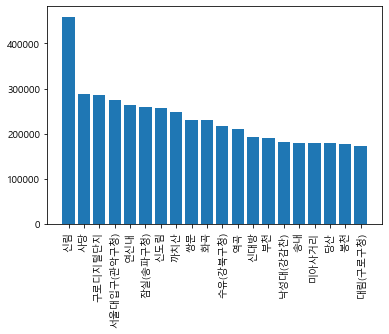

In [37]:
import matplotlib.pyplot as plt
cnt_list = list(dict(sorted_cnt_by_station).values()) # 정렬된 딕셔너리로 바꾼 다음에 값만 뽑아(values) list로 반환한다.
stations = list(dict(sorted_cnt_by_station).keys())
#plt.bar(range(len(cnt_list)), cnt_list, width=3) # 3정도 주어서 400000을 보여줌
#plt.plot(cnt_list)
# plt.bar(range(len(cnt_list[:20])), cnt_list[:20])
# plt.bar([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], cnt_list[:20])
plt.rc('font', family= 'Malgun Gothic')
plt.bar(range(20), cnt_list[:20]) # 20개의 range
plt.xticks(range(20), stations[:20], rotation=90) # 숫자 대신 x축에 20까지의 이름을 보여줬으면 좋겠다!, rotation을 주어 겹치지 않아 보이게 지정
plt.show()

In [38]:
def add_list_by_element(list1, list2):
    # True일 때 사용할 값1 if 조건식 else False일 때 사용할 값2 -> 조건식이 T/F일 때 나올 값
    l, s = (list1, list2) if len(list1) >= len(list2) \
                          else (list2, list1)

    result = l.copy()
    for idx, e in enumerate(s):
            result[idx] = s[idx] + l[idx]
            
    return result

In [ ]:
# 역별 / 시간대별 승객수
import csv

with open('data-files/subway-data.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    cnt_by_station = {} # dictionary
    
    for row in reader:
        #4시 : 4번째
        #7시 : 10번째 -> (7 - 4) *2 + 4   
        hour = 4 # 만약 23시를 보고싶으면 23만 넣으면 끝난당
        idx = (hour - 4) *24 + 4 # 승차
        # idx = (hour - 4) *2 + 5 # 하차
        row[4:-1] = map(lambda x: int(x.replace(',','')), row[4:-1])
        
        cnts = []
        for h in range(24): # 4 + n * 2 의 n이 24 -> 4+0*2 , 4+1*2 ,4 +2*2 ...
            cnt = row[idx + h * 2] + row[ idx + h * 2 + 1] #시작번호 + h * 2 = 4 + n * 2  # 승차시간 + 하차시간 # idx가 4부터 24번 반복, h*2는 승차 하차 두개였으므로
            cnts.append(cnt) # 총 24개의 승하차 시간이 입력된다
        if row[3] in cnt_by_station:
            prev_data = cnt_by_station[row[3]]
            cnt_by_station[row[3]] =add_list_by_element(prev_data , cnts)     
            
        else:
            cnt_by_station[row[3]] = cnts # 없는 역일 경우
            
print(len(list(cnt_by_station.items())[0][1]))          
list(cnt_by_station.items())[0] # items는 리스트가됨

top_one_by_hour = []
for idx in range(24):
    h = idx + 4 # 4시부터
    sorted_by_h = sorted(cnt_by_station.items(), key= lambda kv : kv[1][idx], reverse=True) #시간대 별로 가장 많은 것 1순위로 하기 위해 24번 반복 sorted # kv의 1번의 idx 
    top_one_by_hour.append(sorted_by_h[0])
    top_one_by_hour.append( (sorted_by_h[0][0], sorted_by_h[0][1][idx]) ) # 시간별 가장 높은 순 이름, 두 가지 튜플을 하나로 보여주세요!-> (())
top_one_by_hour

In [65]:
a = [4, 7, 3, 5, 8, 6, 9]
sorted(a, key=lambda kv : kv) # kv에 데이터 하나하나가 오는 것
b = [(4,10), (7,54 ), (1,66), (9,42) , (6, 55), (3, 12), (5, 29)]
sorted(b, key=lambda kv : kv[1]) # 여기서 kv는 (4,10)가 들어가고 , (7,54)....  ->  kv[1]을 기준으로 오름차순 정렬 !! key가 정렬 기준


[(4, 10), (3, 12), (5, 29), (9, 42), (7, 54), (6, 55), (1, 66)]

In [71]:
# 시간대별 승차/하차로 나누기
import csv

with open('data-files/subway-data.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    cnt_by_hour = {} # dictionary
    
    for row in reader:  
        hour = 4 # 만약 23시를 보고싶으면 23만 넣으면 끝난당
        idx = (hour - 4) *24 + 4 # 승차
        row[4:-1] = map(lambda x: int(x.replace(',','')), row[4:-1])
        
        cnts = []
        for h in range(24):
            cnt = [row[idx + h * 2] , row[idx + h * 2 + 1]]
            if h in cnt_by_hour:
                prev_data = cnt_by_hour[h]
                new_data = add_list_by_element(prev_data, cnt) # 4(시): [승차,하차], 5:[,] ... 모양으로 나오게
                cnt_by_hour[h] =new_data
                
            else:
                cnt_by_hour[h]=cnt  #처음이면 추가, 그렇지 않으면 더함 (여기는 처음)
                
# print(cnt_by_hour) 
sorted_cnt_by_hour = sorted(cnt_by_hour.items(), key=lambda kv: kv[1][0] + kv[1][1], reverse= True) # 전체를 기준으로 정렬

sorted_cnt_by_hour # 14번 -> 저녁 6시 합쳐서 인원 젤 많다

[(14, [17965005, 16489387]),
 (4, [15257337, 18094697]),
 (13, [13278794, 11257355]),
 (15, [9850784, 13620575]),
 (5, [9383341, 11885809]),
 (3, [13222919, 7884852]),
 (12, [9970996, 8981738]),
 (11, [8689880, 8214553]),
 (9, [7937772, 7888863]),
 (10, [7960799, 7840074]),
 (16, [7539696, 8179318]),
 (8, [7508286, 7193539]),
 (6, [6867525, 7413014]),
 (17, [6865561, 7076573]),
 (7, [6884571, 6869507]),
 (18, [5626715, 6371986]),
 (2, [5313295, 3645705]),
 (19, [2090385, 4255486]),
 (1, [2735202, 722627]),
 (20, [36842, 644821]),
 (0, [114714, 1414]),
 (21, [22, 62]),
 (22, [9, 15]),
 (23, [0, 0])]